# Exploratory Data Analysis on Churn Dataset


## Importing Libraries


In [1]:
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df = pd.read_csv('Abandono_clientes.csv')

# Dropping unnecessary columns for the EDA
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Check for null values in each column
print("\nNull Values in Each Column:")
print(df.isnull().sum())



Null Values in Each Column:
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Not even a single null value, that's good.


### What is Churn?
First of all, I want to explain what is churn.
According to RD Station (Marketing Company)<a name="cite_ref-1"></a>[<sup>[1]</sup>](https://www.rdstation.com/blog/marketing/o-que-e-churn/), Churn is a metric that indicates the number of customers who exited a company or a service in a given period of time. Churn rate can be an indicator of how satisfied customers are with a product or service. An increase in churn rate almost always suggests problems.

Now that we understand what is Churn, let's understand more our data.


#### Explaining the variables:

* CreditScore: Score that represents the creditworthiness of the customer. Higher scores indicate better financial responsibility and reliability.
* Geography: The country or region where the customer resides. [France, Germany, Spain]
* Gender: The gender of the customer.
* Age: The age of the customer in years.
* Tenure: The number of years the customer has been with the company.
* Balace: The amount of money the customer has in their account.
* NumOfProducts: The number of products the customer has purchased.
* HasCrCard: Indicates whether the customer has a credit card or not.
* IsActiveMember: Indicates whether the customer is an active member or not.
* EstimatedSalary: Estimated annual salary of the customer.
* Exited: Indicates whether the customer has exited the company or not. (Churn)

### Descritive Statistics

In [4]:
# Removing binary features
df.drop(['Exited', 'HasCrCard', 'IsActiveMember'], axis=1).describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


* The standard deviation of ~97 on CreditScore suggests considerable variation
* The mean age is ~39, suggests that the customers are relatively young
* The 25-75% quartile range (32-44 years) shows that the customer segment is working-age adults
* Average tenure of 5 years is significant, it suggests decent customer retention
* The large standard deviation of the Balance shows extremely diverse financial engagement levels
* Interesting that the 25th percentile of Balance is $0, suggesting many inactive or new accounts

I chose these metrics because with these simple analysis we understand a little about:
* Customer Quality, analyzing their credit score
* Our customers age range 
* How loyal to the bank they are (avg. Tenure)
* Financial Engagement of the customers
  
And these factors are very important for Churn Analysis.

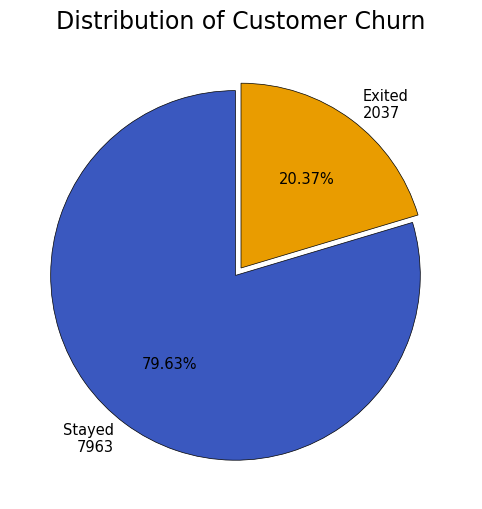

In [5]:
# Create a pie chart for the 'Exited' column distribution
plt.figure(figsize=(8, 6))
exited_counts = df['Exited'].value_counts()
labels = ['Stayed', 'Exited']
values = exited_counts.values
percentages = (values / len(df) * 100).round(2)

plt.pie(values, labels=[f'{labels[i]}\n{values[i]}' for i in range(len(labels))], 
        autopct='%1.2f%%', startangle=90, explode=[0.05, 0],
        textprops={'fontsize': 10.5}, colors=['#3a58bf', '#e99c00'],
        wedgeprops={'edgecolor': 'black', 'linewidth': 0.5, 'antialiased': True})
plt.title('Distribution of Customer Churn', fontsize=17)
plt.show()


As we can see, our churn rate is around 20%, which is high and we need to understand how this is happening. Clearly there is a class imbalance, but that's okay.


In [6]:
# Converting Gender column to binary: Male=1, Female=0
df_corr = df.copy()
df_corr['Male'] = np.where(df_corr['Gender'] == 'Male', 1, 0)
df_corr.drop('Gender', axis=1, inplace=True)

# One-hot encoding for Geography column
geography_dummies = pd.get_dummies(df_corr['Geography'], prefix='Geo', dtype=int)
df_corr = pd.concat([df_corr, geography_dummies], axis=1)
df_corr.drop('Geography', axis=1, inplace=True)

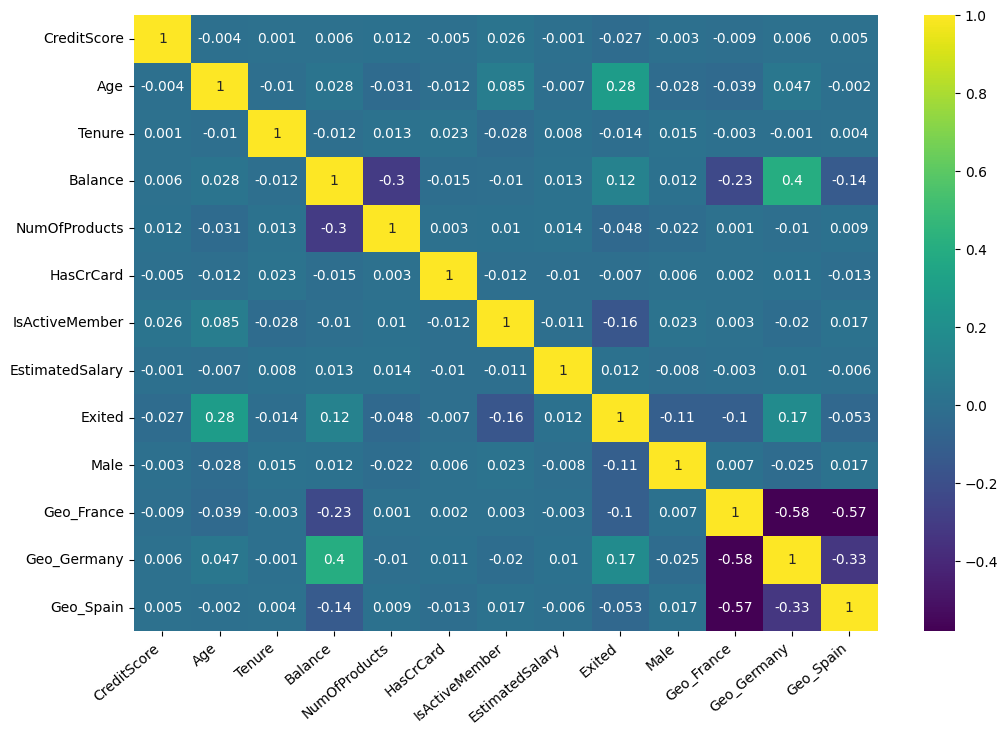

In [7]:
# Plotting a heatmap of the correlations looking for relations between variables
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr().round(3),
            annot=True,
            cmap='viridis')
plt.xticks(rotation=40, ha='right');

* An important point that we can observe is that the variable Exited (our dependent variable) has a weak positive correlation with Age (**0.28**), that is, as the person ages, it correlates with their exit.
* Apparently the country with the highest Balance is Germany, since the correlation between the two variables is moderate (**0.4**) and it was showed previously
* Exited has very weak correlation between Genders (**-0.11**, as is negative, Exited increases and Male decreases, it means the Female has more chances of leaving)



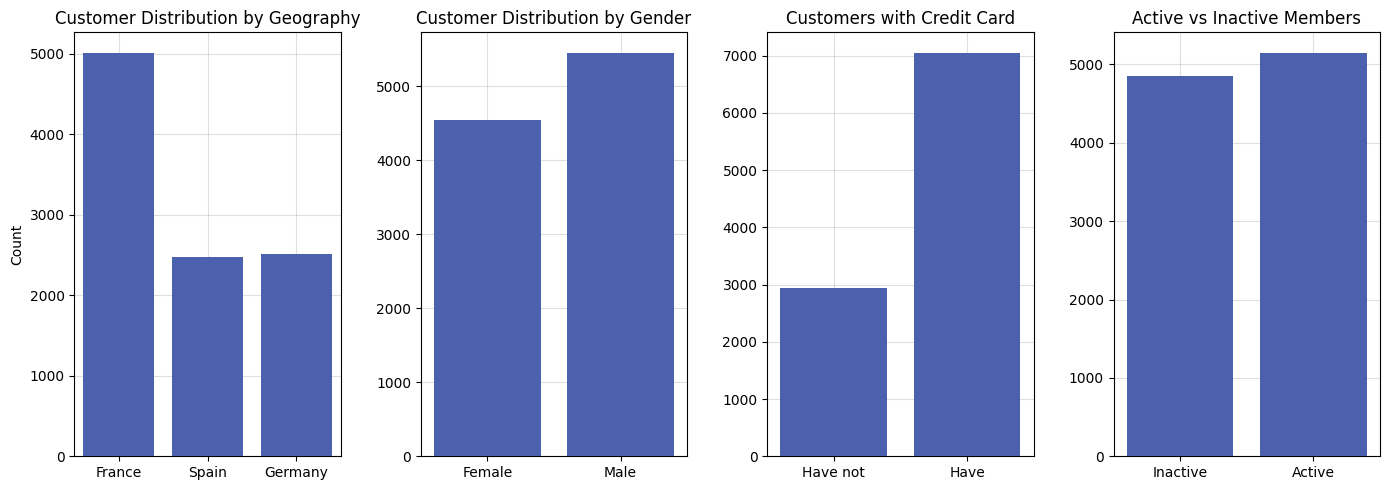

In [8]:
# Create a figure with subplots for categorical variables
plt.figure(figsize=(14, 5))

plot_sequence = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
title_sequence = ['Customer Distribution by Geography',
                  'Customer Distribution by Gender',
                  'Customers with Credit Card',
                  'Active vs Inactive Members']

for i, col in enumerate(plot_sequence):
    # Create a subplot
    plt.subplot(1, 4, i + 1)
    sns.countplot(data=df, x=col, color='#3a58bf', zorder=10)
    plt.title(title_sequence[i])
    plt.xlabel('')
    plt.ylabel('Count' if i == 0 else '')
    plt.grid(zorder=10, alpha=.4)
    if col == 'HasCrCard':
        plt.xticks([0, 1], ['Have not', 'Have'])
    elif col == 'IsActiveMember':
        plt.xticks([0, 1], ['Inactive', 'Active'])
    
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.show()    

* Most part of the clients are from France
* The distribution between Male and Female is balanced
* More than 70& of the customers have Credit Card
* Active and Inactive members are very balanced

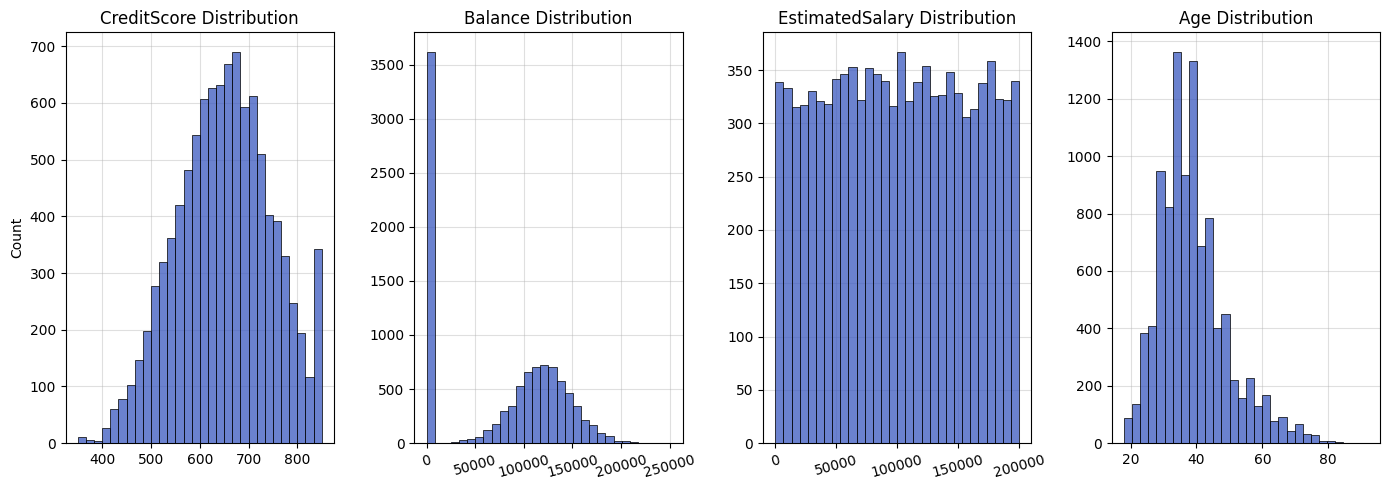

In [9]:
plt.figure(figsize=(14, 5))

plot_sequence = ['CreditScore', 'Balance', 'EstimatedSalary', 'Age']
title_sequence = ['CreditScore Distribution',
                  'Balance Distribution',
                  'EstimatedSalary Distribution',
                  'Age Distribution']

for i, col in enumerate(plot_sequence):
    plt.subplot(1, 4, i + 1)
    sns.histplot(data=df, x=col, color='#3a58bf', bins=30, zorder=10)
    plt.title(title_sequence[i])
    plt.xlabel('')
    plt.ylabel('Count' if i == 0 else '')
    plt.grid(zorder=10, alpha=.4)
    if col in ('EstimatedSalary', 'Balance'):
        plt.xticks(rotation=15)

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.show() 


In [10]:
df[['CreditScore', 'Balance', 'EstimatedSalary', 'Age']].describe()

,CreditScore,Balance,EstimatedSalary,Age
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,76485.889288,100090.239881,38.921800
std,96.653299,62397.405202,57510.492818,10.487806
min,350.000000,0.000000,11.580000,18.000000
25%,584.000000,0.000000,51002.110000,32.000000
50%,652.000000,97198.540000,100193.915000,37.000000
75%,718.000000,127644.240000,149388.247500,44.000000
max,850.000000,250898.090000,199992.480000,92.000000


* Credit Score Distribution:
  * The distribution is approximately normal, with a peak close to 700, so the biggest part of the clients has a good CreditScore
  * Outliers seem to exist at both lower and higher extremes, particularly near 400 and above 800.
* Balance Distribuion:
  * The significant spike at 0 indicates a huge number of customers with no balance.
  * The remaining balance values form a roughly normal distribution, centered near 125,000.
* Estimated Salary Distribution:
  * The distribution is uniform, with nearly equal frequency across the range of salaries.
  * There are no visible outliers or skewness in this data.

### Investigating the behavior of numeric variables across countries


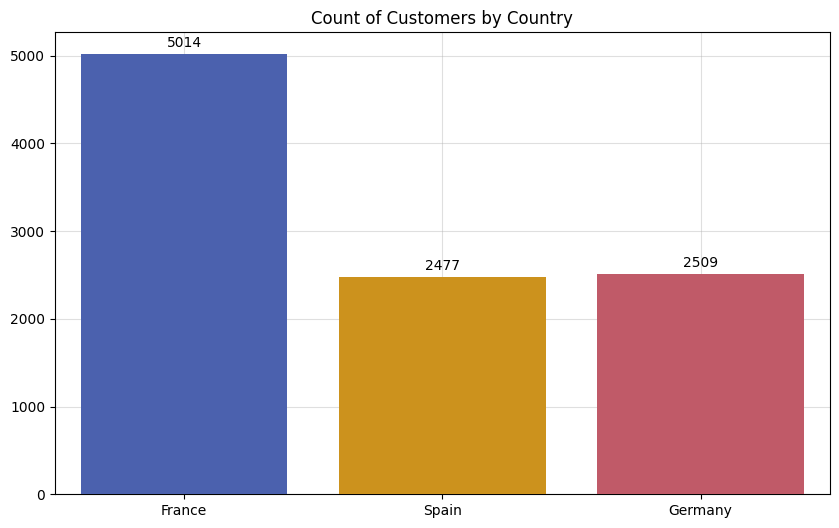

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Geography', zorder=10, 
              palette=['#3a58bf', '#e99c00', '#d1495b'])
plt.title('Count of Customers by Country')
plt.grid(alpha=.4, zorder=-10)
plt.xlabel('')
plt.ylabel('')

for i in plt.gca().containers:
    plt.bar_label(i, fmt='%.0f', padding=3)

plt.show()


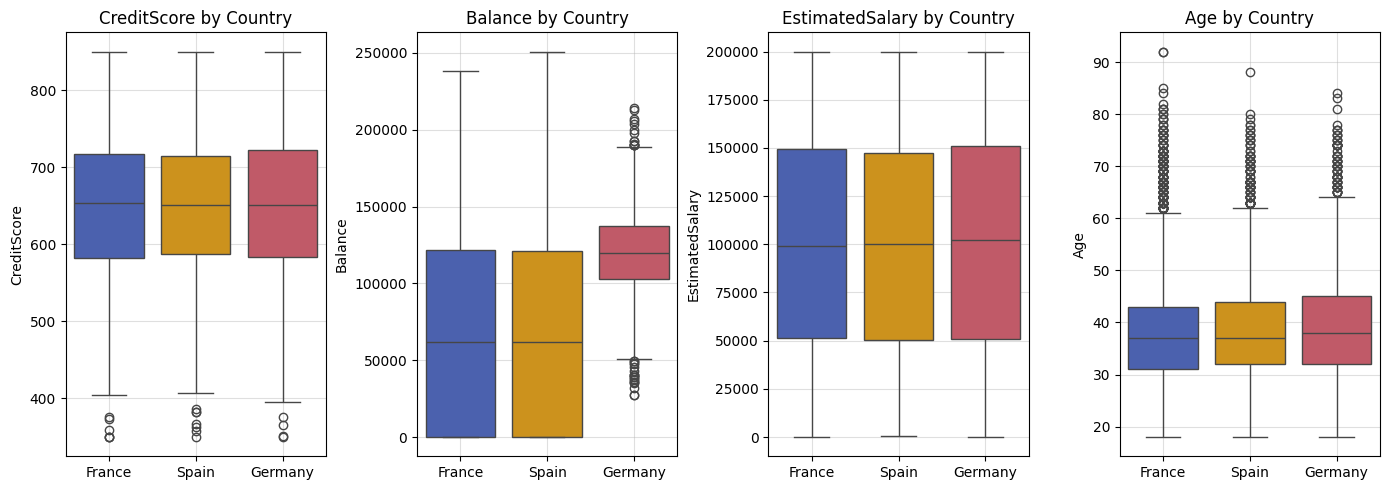

In [12]:
plt.figure(figsize=(14, 5))

plot_sequence = ['CreditScore', 'Balance', 'EstimatedSalary', 'Age']
title_sequence = ['CreditScore by Country',
                  'Balance by Country',
                  'EstimatedSalary by Country',
                  'Age by Country']

palette = ['#3a58bf', '#e99c00', '#d1495b']

for i, col in enumerate(plot_sequence):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(data=df, x='Geography', y=col, palette=palette)
    plt.title(title_sequence[i])
    plt.xlabel('')
    plt.grid(alpha=.4)

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()


I chose boxplot to show this infos because the data is assynetrical since france has more customers, but with the boxplot we treat quartiles, so we can easily compare then.

* Credit Score:
  * France has a distribution relatively symmetrical with some outliers below 500.
  * Spain has the lowest median among the countries, but still very close to others.
  * Even with France having more customers, the distribution between each country is similar
* Balance:
  * France has the lowest median among the countries, but still very close to Spain.
  * Germany has the highest median among the countries by far and its distribution is more compact, suggesting customers have similar balance amounts.
  * One important fact to comment is that no Germany customer has balance equal to 0
* Estimated Salary:
  * As we could see in the histogram previously is pretty uniform even among the three countries
* Age:
  * We could see a little stair in the distributions, suggesting that France is younger along its distribution among the countries and germany is a little older

### Investigating the behavior of the variables with Exited

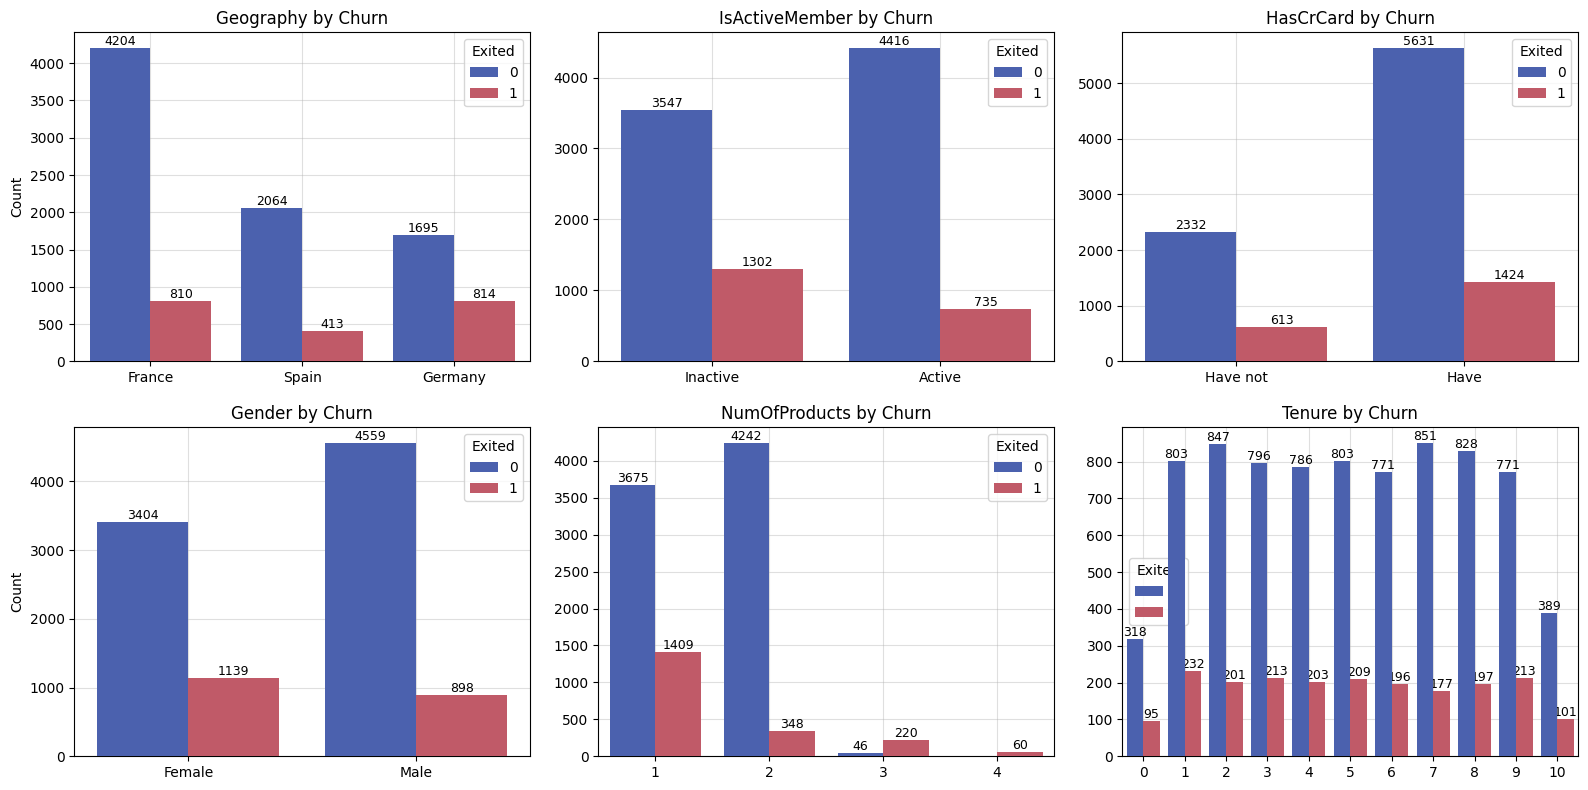

In [13]:
plt.figure(figsize=(16, 8))

plot_sequence = ['Geography', 'IsActiveMember', 'HasCrCard', 'Gender',
                 'NumOfProducts', 'Tenure']
title_sequence = ['Geography by Churn',
                  'IsActiveMember by Churn',
                  'HasCrCard by Churn',
                  'Gender by Churn',
                  'NumOfProducts by Churn',
                  'Tenure by Churn']
palette = ['#3a58bf', '#d1495b']

for i, col in enumerate(plot_sequence):
    plt.subplot(2, 3, i + 1)
    ax = sns.countplot(data=df, x=col, hue='Exited', palette=palette, zorder=10)
    plt.title(title_sequence[i])
    plt.xlabel('')
    plt.ylabel('Count' if i in (0, 3) else '')
    plt.grid(alpha=.4, zorder=-10)
    if col == 'IsActiveMember':
        plt.xticks([0, 1], ['Inactive', 'Active'])
    elif col == 'HasCrCard':
        plt.xticks([0, 1], ['Have not', 'Have'])
    for container in ax.containers:
        ax.bar_label(container, fontsize=9)

plt.tight_layout()
plt.subplots_adjust(wspace=0.15, hspace=0.2)
plt.show()


* Germany shows the biggest number of exited people, numerically and proportionally
* Naturally, Is Active Member shows that the chance of losing the customer is bigger when the customer is inactive
* The Gender attribute also show a big impact that was commented on the Correlation Heatmap that more woman exited than man, numerically and mainly proportionally
* Analysing Number of Products is interesting. The bar plot suggests that as the customer buys more products, the chance of him exit the company decreases

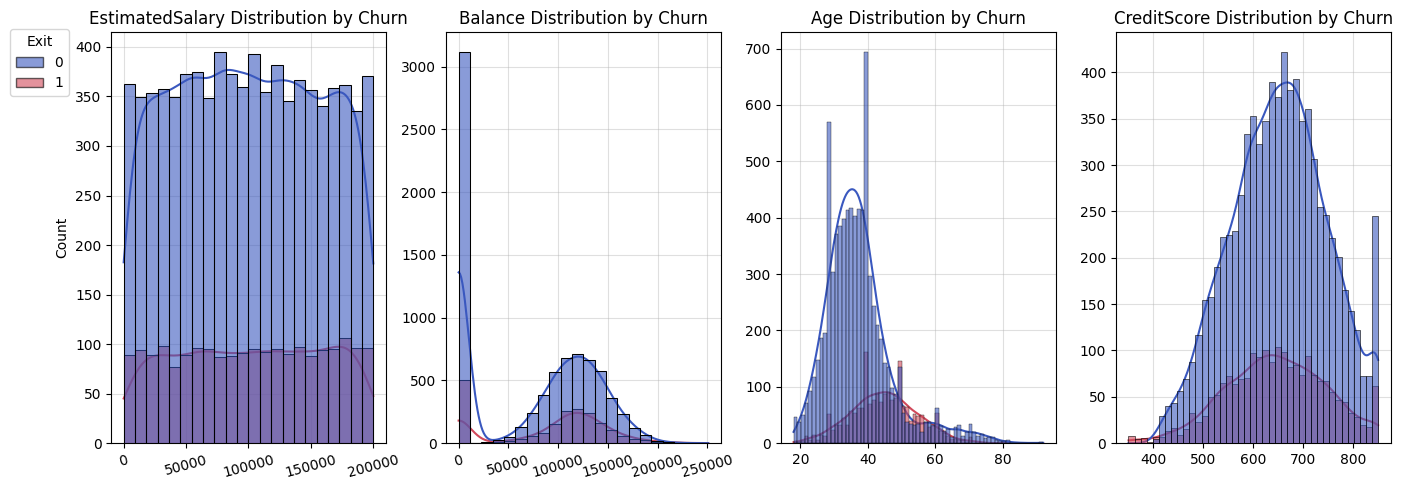

In [14]:
plt.figure(figsize=(15, 5))

plot_sequence = ['EstimatedSalary', 'Balance', 'Age', 'CreditScore']
title_sequence = ['EstimatedSalary Distribution by Churn',
                  'Balance Distribution by Churn',
                  'Age Distribution by Churn',
                  'CreditScore Distribution by Churn']

palette = ['#3a58bf', '#d1495b']

for i, col in enumerate(plot_sequence):
    plt.subplot(1, 4, i + 1)
    ax = sns.histplot(data=df, x=col, hue='Exited', palette=palette, multiple="layer", 
                      alpha=0.6, zorder=10, kde=True, legend=False)
    plt.title(title_sequence[i])
    plt.xlabel('')
    plt.ylabel('Count' if i == 0 else '')
    plt.grid(alpha=.4, zorder=-10)
    if col in ('EstimatedSalary', 'Balance'):
        plt.xticks(rotation=15)

legend_labels = [Patch(facecolor=palette[0], edgecolor='black', label=0, alpha=0.6),
                 Patch(facecolor=palette[1], edgecolor='black', label=1, alpha=0.6)]

plt.figlegend(handles=legend_labels, title='Exit', loc='center left', bbox_to_anchor=(-0.025, 0.865))

plt.tight_layout()
plt.subplots_adjust(wspace=0.22, hspace=0.2, right=0.9)
plt.show()


* Both churned and non-churned groups share a similar shape in distribution.
* Apparently, the customer with balance equals to 0, the churn chance is smaller
* Churn is more prevalent among customers in their late 40s and early 50s, as indicated by the red peaks overlapping the blue distribution.
* Younger and older customers are less likely to churn compared to middle-aged customers.
* Customers with CreditScore under 400 are more propense do exit the finance institution



### Conclusion and Key Findings from the Exploratory Data Analysis:

1. Age Distribution:
   - Higher churn rates are observed among customers in their late 40s and early 50s
   - Younger and older customers show lower churn propensity


2. Credit Score Impact:
   - Customers with credit scores below 400 show higher likelihood of churning, this indicates that financial health is a significant factor in customer retention

1. Balance Patterns:
   - Customers with zero balance demonstrate lower churn rates
   - There's a relatively even distribution of churn across different balance levels
   - This suggests that active account usage might be related to churn behavior

2. Salary Distribution:
   - No strong correlation between estimated salary and churn behavior
   - Churn occurs across all salary ranges

### Strategic Recommendations:

1. Age-Targeted Retention:
   - Develop specialized retention programs for middle-aged customers (40-55 years)
   - Create products/services tailored to this age group's specific needs

2. Credit Score Management:
   - Implement early warning systems for customers with declining credit scores
   - Provide financial advisory services to customers with lower credit scores
   - Consider developing products specifically for credit-building

3. Account Activity:
   - Monitor account activity levels, especially for non-zero balance accounts
   - Develop engagement strategies for active account holders

* General Strategy:
   - Implement a multi-faceted retention strategy focusing on:
     * Middle-aged customer segment
     * Credit score improvement support
     * Active account engagement
     * Personalized customer experience based on usage patterns

With that in mind, predicting customer churn is crucial because it allows businesses to proactively identify customers at risk of leaving, enabling them to take targeted actions to retain those customers, thus minimizing revenue loss, optimizing resource allocation, and ultimately improving overall customer retention and profitability. According to Avaus (Data Consultoring with focus on marketing, sales and customer service)<a name="cite_ref-1"></a>[<sup>[2]</sup>](https://www.avaus.com/blog/predicting-customer-churn/#:~:text=Churn%20prediction%20means%20detecting%20which,more%20than%20retaining%20existing%20ones.) predict churn is critical for many businesses because acquiring new clients often costs more than retaining existing ones. 

So let's create a model to predict churn!